In [1]:
!git clone https://github.com/ultralytics/ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 35553, done.
remote: Counting objects: 100% (4130/4130), done.
remote: Compressing objects: 100% (1779/1779), done.
remote: Total 35553 (delta 2849), reused 3460 (delta 2332), pack-reused 31423
Receiving objects: 100% (35553/35553), 29.76 MiB | 30.57 MiB/s, done.
Resolving deltas: 100% (25608/25608), done.


In [2]:
%cd ./ultralytics

/content/ultralytics


In [3]:
!pip install -e .

Obtaining file:///content/ultralytics
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)

In [4]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.2 MB/s eta 0:00:00


In [5]:
from google.colab import drive
import os
import torch
import yaml
from IPython.display import Image, clear_output  # to display images

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.3.1+cu121 (NVIDIA L4)


In [8]:
data_dir = '/content/drive/MyDrive/DAB/fused_food_ingredients_0806'
data_yaml = '/content/drive/MyDrive/DAB/fused_food_ingredients_0806/data.yaml'

In [9]:
with open(data_yaml) as f:
    film = yaml.load(f, Loader=yaml.FullLoader)
    display(film)

{'train': '../train/images',
 'val': '../valid/images',
 'test': '../test/images',
 'nc': 37,
 'names': ['Enoki Mushroom',
  'Shiitake mushrooms',
  'apple',
  'banana',
  'beaf',
  'bean_sprouts',
  'bellpepper',
  'bread',
  'brocoli',
  'cabbage',
  'carrot',
  'cheese',
  'chicken',
  'chili',
  'corn',
  'cucumber',
  'egg',
  'eggplant',
  'fish',
  'garlic',
  'ginger',
  'green_onion',
  'kimchi',
  'lettuce',
  'mushroom',
  'onion',
  'orange',
  'pork',
  'potato',
  'pumpkin',
  'radish',
  'sausage',
  'shrimp',
  'sweet_potato',
  'tofu',
  'tomato',
  'tuna can'],
 'roboflow': {'workspace': 'dab-zgcvo',
  'project': 'food_ingredients_fused',
  'version': 2,
  'license': 'CC BY 4.0',
  'url': 'https://universe.roboflow.com/dab-zgcvo/food_ingredients_fused/dataset/2'}}

In [11]:
from ultralytics import YOLO
import shutil

# Train for validation of our training Logic
first, Single Ingredient dataset  
second, Fused Ingredient dataset  

In [12]:
# 8월 6일자 모델, 55,000 개 단일 식자재 이미지셋에 대해서 50 에폭 돌린 상태 (0704 모델, 어느정도 학습된 모델에 기반해서 추가 학습됨)
checkpoint_dir = '/content/drive/MyDrive/DAB/checkpoints/0806'
model = YOLO(os.path.join(checkpoint_dir, 'best.pt'))
model.train(data=data_yaml, epochs=50, imgsz=640, batch=32, cache=True)

Ultralytics YOLOv8.2.74 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/DAB/checkpoints/0806/best.pt, data=/content/drive/MyDrive/DAB/fused_food_ingredients_0806/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=F

100%|██████████| 755k/755k [00:00<00:00, 31.0MB/s]


Overriding model.yaml nc=36 with nc=37

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 6.25M/6.25M [00:00<00:00, 123MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/DAB/fused_food_ingredients_0806/train/labels... 10287 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10287/10287 [11:20<00:00, 15.12it/s]

train: WARNING ⚠️ /content/drive/MyDrive/DAB/fused_food_ingredients_0806/train/images/465_png.rf.264bd51d37910b92d96bbbadf5fae932.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/DAB/fused_food_ingredients_0806/train/images/465_png.rf.86e33deece5d68f081680c19fefb6160.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/DAB/fused_food_ingredients_0806/train/images/465_png.rf.9524194d0feb509fdd7eb08fad9ff800.jpg: 1 duplicate labels removed


train: New cache created: /content/drive/MyDrive/DAB/fused_food_ingredients_0806/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 375, len(boxes) = 79651. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


train: Caching images (11.8GB RAM): 100%|██████████| 10287/10287 [00:30<00:00, 332.82it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/DAB/fused_food_ingredients_0806/valid/labels... 599 images, 0 backgrounds, 0 corrupt: 100%|██████████| 599/599 [00:31<00:00, 18.80it/s]


val: New cache created: /content/drive/MyDrive/DAB/fused_food_ingredients_0806/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 13, len(boxes) = 4761. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: Caching images (0.7GB RAM): 100%|██████████| 599/599 [00:01<00:00, 357.71it/s]


Plotting labels to /content/ultralytics/runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000244, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/ultralytics/runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      5.86G      1.665      3.291       1.56        252        640: 100%|██████████| 322/322 [01:14<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.20it/s]

                   all        599       4761       0.82       0.28      0.292      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.36G       1.35      1.173      1.307        242        640: 100%|██████████| 322/322 [01:05<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.12it/s]


                   all        599       4761      0.765      0.383      0.422      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      5.27G      1.223      0.919      1.233        210        640: 100%|██████████| 322/322 [01:04<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.22it/s]


                   all        599       4761      0.656      0.426      0.468      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      5.21G      1.122     0.7931      1.173        276        640: 100%|██████████| 322/322 [01:04<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.23it/s]


                   all        599       4761      0.637      0.458      0.492      0.323

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.26G      1.044     0.7248      1.133        235        640: 100%|██████████| 322/322 [01:04<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.23it/s]

                   all        599       4761      0.639      0.444      0.496      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       5.3G     0.9824     0.6757      1.101        329        640: 100%|██████████| 322/322 [01:04<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.23it/s]


                   all        599       4761      0.642      0.448      0.496      0.327

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.31G     0.9314      0.639      1.074        283        640: 100%|██████████| 322/322 [01:04<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.22it/s]

                   all        599       4761      0.643      0.456      0.504      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.38G     0.8912     0.6098      1.058        223        640: 100%|██████████| 322/322 [01:03<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.28it/s]

                   all        599       4761      0.634      0.471      0.518      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      5.94G     0.8538     0.5873       1.04        297        640: 100%|██████████| 322/322 [01:03<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.23it/s]

                   all        599       4761      0.624      0.475      0.523      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.48G     0.8249      0.566      1.028        186        640: 100%|██████████| 322/322 [01:03<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.26it/s]

                   all        599       4761      0.646      0.473      0.524      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      5.16G     0.8099     0.5549       1.02        213        640: 100%|██████████| 322/322 [01:03<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.26it/s]

                   all        599       4761      0.651      0.458      0.533      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      5.65G     0.7852     0.5368      1.012        266        640: 100%|██████████| 322/322 [01:03<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.33it/s]

                   all        599       4761      0.637      0.479       0.53      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.81G     0.7648     0.5243      1.002        306        640: 100%|██████████| 322/322 [01:03<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.26it/s]

                   all        599       4761      0.632      0.487      0.531      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.61G     0.7502     0.5135      0.996        222        640: 100%|██████████| 322/322 [01:03<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.26it/s]

                   all        599       4761      0.635      0.477      0.532      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      5.24G     0.7382     0.5057     0.9915        282        640: 100%|██████████| 322/322 [01:03<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.31it/s]

                   all        599       4761      0.669      0.475      0.535      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.32G     0.7192     0.4943      0.983        313        640: 100%|██████████| 322/322 [01:03<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.26it/s]

                   all        599       4761      0.669       0.49      0.538      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.62G     0.7121     0.4872     0.9794        291        640: 100%|██████████| 322/322 [01:03<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.30it/s]

                   all        599       4761      0.639      0.487      0.564      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.92G     0.7049     0.4832     0.9768        371        640: 100%|██████████| 322/322 [01:03<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.31it/s]

                   all        599       4761      0.654      0.521      0.551       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      5.13G     0.6928      0.474     0.9729        220        640: 100%|██████████| 322/322 [01:03<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.32it/s]

                   all        599       4761      0.662      0.508      0.543       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.69G     0.6865     0.4694     0.9687        203        640: 100%|██████████| 322/322 [01:03<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.24it/s]

                   all        599       4761      0.674      0.503      0.559      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       5.5G      0.673     0.4597     0.9647        207        640: 100%|██████████| 322/322 [01:03<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.26it/s]

                   all        599       4761      0.707      0.481      0.559      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.37G     0.6666      0.456     0.9611        321        640: 100%|██████████| 322/322 [01:03<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.25it/s]

                   all        599       4761      0.658      0.515      0.558      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.66G     0.6594     0.4491     0.9589        283        640: 100%|██████████| 322/322 [01:03<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.27it/s]

                   all        599       4761      0.642      0.528      0.567      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.84G     0.6496     0.4443     0.9545        181        640: 100%|██████████| 322/322 [01:03<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.28it/s]

                   all        599       4761      0.661      0.542      0.583      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.03G     0.6446     0.4402     0.9529        268        640: 100%|██████████| 322/322 [01:03<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.30it/s]

                   all        599       4761      0.672      0.522      0.563      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.32G     0.6428     0.4395     0.9543        277        640: 100%|██████████| 322/322 [01:03<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.28it/s]

                   all        599       4761      0.612      0.573      0.566      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.94G      0.634     0.4323     0.9496        237        640: 100%|██████████| 322/322 [01:03<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.28it/s]

                   all        599       4761       0.64      0.545      0.565      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.89G      0.629       0.43     0.9473        244        640: 100%|██████████| 322/322 [01:03<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.26it/s]

                   all        599       4761      0.632       0.56      0.568      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.92G     0.6252     0.4266     0.9457        204        640: 100%|██████████| 322/322 [01:03<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.30it/s]

                   all        599       4761       0.62      0.559      0.567      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      6.25G     0.6205     0.4229     0.9439        308        640: 100%|██████████| 322/322 [01:03<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.23it/s]

                   all        599       4761      0.639      0.548      0.571      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.28G     0.6175      0.422     0.9442        291        640: 100%|██████████| 322/322 [01:03<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.30it/s]

                   all        599       4761      0.691      0.544      0.572      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         5G     0.6098     0.4173     0.9393        233        640: 100%|██████████| 322/322 [01:03<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.24it/s]

                   all        599       4761       0.69      0.545       0.57      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.69G     0.6092     0.4151       0.94        333        640: 100%|██████████| 322/322 [01:03<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.19it/s]

                   all        599       4761      0.684      0.545      0.574        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.67G     0.6035     0.4123     0.9392        213        640: 100%|██████████| 322/322 [01:03<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.25it/s]

                   all        599       4761      0.673      0.556      0.572      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      5.17G     0.6025     0.4098     0.9382        281        640: 100%|██████████| 322/322 [01:03<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.17it/s]

                   all        599       4761      0.689      0.532      0.575      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      5.69G     0.5948     0.4056     0.9336        232        640: 100%|██████████| 322/322 [01:03<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.32it/s]

                   all        599       4761      0.666      0.565      0.578      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      5.78G     0.5954     0.4059     0.9361        290        640: 100%|██████████| 322/322 [01:03<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.31it/s]

                   all        599       4761      0.689      0.536      0.573      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       5.3G     0.5925     0.4037      0.935        336        640: 100%|██████████| 322/322 [01:03<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.31it/s]

                   all        599       4761      0.694      0.548      0.578      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      5.52G     0.5876     0.4014     0.9332        211        640: 100%|██████████| 322/322 [01:03<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.27it/s]

                   all        599       4761      0.692      0.559       0.58      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.02G     0.5876     0.4015     0.9323        299        640: 100%|██████████| 322/322 [01:03<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.27it/s]

                   all        599       4761      0.669      0.576      0.578      0.402


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.95G      1.049      0.644       1.28        123        640: 100%|██████████| 322/322 [01:01<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.29it/s]

                   all        599       4761      0.732      0.552      0.578      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.63G      1.001     0.5831       1.24        121        640: 100%|██████████| 322/322 [00:59<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.24it/s]

                   all        599       4761      0.713      0.585      0.586       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.61G     0.9807     0.5682      1.226        131        640: 100%|██████████| 322/322 [00:59<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.27it/s]

                   all        599       4761      0.709      0.587      0.589      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.56G     0.9684     0.5566      1.217        104        640: 100%|██████████| 322/322 [00:59<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.31it/s]

                   all        599       4761      0.713       0.59      0.592      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.61G     0.9607     0.5525      1.209        129        640: 100%|██████████| 322/322 [00:59<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.29it/s]

                   all        599       4761      0.729      0.571      0.592      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.63G     0.9523     0.5422      1.204        132        640: 100%|██████████| 322/322 [00:59<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.30it/s]

                   all        599       4761      0.746      0.564      0.593      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.61G     0.9465     0.5385      1.203        122        640: 100%|██████████| 322/322 [00:59<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.26it/s]

                   all        599       4761      0.757      0.558      0.595      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.63G     0.9439     0.5367      1.199        115        640: 100%|██████████| 322/322 [00:59<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.25it/s]

                   all        599       4761      0.735      0.568      0.594      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.56G     0.9425     0.5343      1.199         96        640: 100%|██████████| 322/322 [00:59<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.27it/s]

                   all        599       4761      0.747      0.564      0.594      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       4.6G     0.9368     0.5313      1.192        133        640: 100%|██████████| 322/322 [00:59<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.31it/s]

                   all        599       4761      0.729       0.57      0.596      0.427



50 epochs completed in 0.933 hours.
Optimizer stripped from /content/ultralytics/runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from /content/ultralytics/runs/detect/train/weights/best.pt, 6.3MB

Validating /content/ultralytics/runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.74 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3,012,863 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  20%|██        | 2/10 [00:00<00:03,  2.23it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:11<00:00,  1.11s/it]


                   all        599       4761      0.718       0.55      0.568      0.404
                 apple         60        171      0.912       0.91      0.945      0.618
                banana         51        120      0.832      0.858      0.877      0.512
                  beaf          5          5      0.364        0.4       0.45      0.371
          bean_sprouts          1          1          0          0          0          0
            bellpepper        164        176      0.879      0.835       0.86      0.643
               brocoli          7          7      0.522      0.317      0.489      0.364
               cabbage          4          4          1      0.608       0.75        0.6
                carrot        150        188       0.79      0.835      0.849      0.567
               chicken        152        473      0.888      0.795      0.827      0.639
                 chili         71         91       0.75      0.791      0.813      0.469
                  cor

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 2,  3,  4,  5,  6,  8,  9, 10, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78bdf1eb3af0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,

# Create_Checkpoint & Visualize inferenced samples


In [13]:
import os
# yolov8 실행결과 디렉토리 경로
result_directory = '/content/ultralytics/runs/detect/train'
# yolov8 실행결과 디렉토리의 파일 및 디렉토리 목록 출력
print(f"result_directory: {result_directory}")
for item in os.listdir(result_directory):
    print(item)

result_directory: /content/ultralytics/runs/detect/train
results.csv
train_batch12882.jpg
train_batch1.jpg
val_batch0_pred.jpg
R_curve.png
weights
val_batch2_labels.jpg
train_batch2.jpg
val_batch1_pred.jpg
P_curve.png
train_batch0.jpg
PR_curve.png
confusion_matrix_normalized.png
train_batch12881.jpg
val_batch2_pred.jpg
events.out.tfevents.1723017149.ff07f739b232.1931.0
val_batch0_labels.jpg
F1_curve.png
results.png
confusion_matrix.png
args.yaml
train_batch12880.jpg
labels.jpg
labels_correlogram.jpg
val_batch1_labels.jpg


In [14]:
# Checkpoint 생성
best_model_path = '/content/ultralytics/runs/detect/train/weights/best.pt'
last_model_path = '/content/ultralytics/runs/detect/train/weights/last.pt'

drive_best_model_path = '/content/drive/MyDrive/DAB/checkpoints/0807/tmp/best.pt'
drive_last_model_path = '/content/drive/MyDrive/DAB/checkpoints/0807/tmp/last.pt'

os.makedirs(os.path.dirname(drive_best_model_path), exist_ok=True)
os.makedirs(os.path.dirname(drive_last_model_path), exist_ok=True)

shutil.copyfile(best_model_path, drive_best_model_path)
shutil.copyfile(last_model_path, drive_last_model_path)

print(f"Best model saved to {drive_best_model_path}")
print(f"Last model saved to {drive_last_model_path}")

Best model saved to /content/drive/MyDrive/DAB/checkpoints/0807/tmp/best.pt
Last model saved to /content/drive/MyDrive/DAB/checkpoints/0807/tmp/last.pt


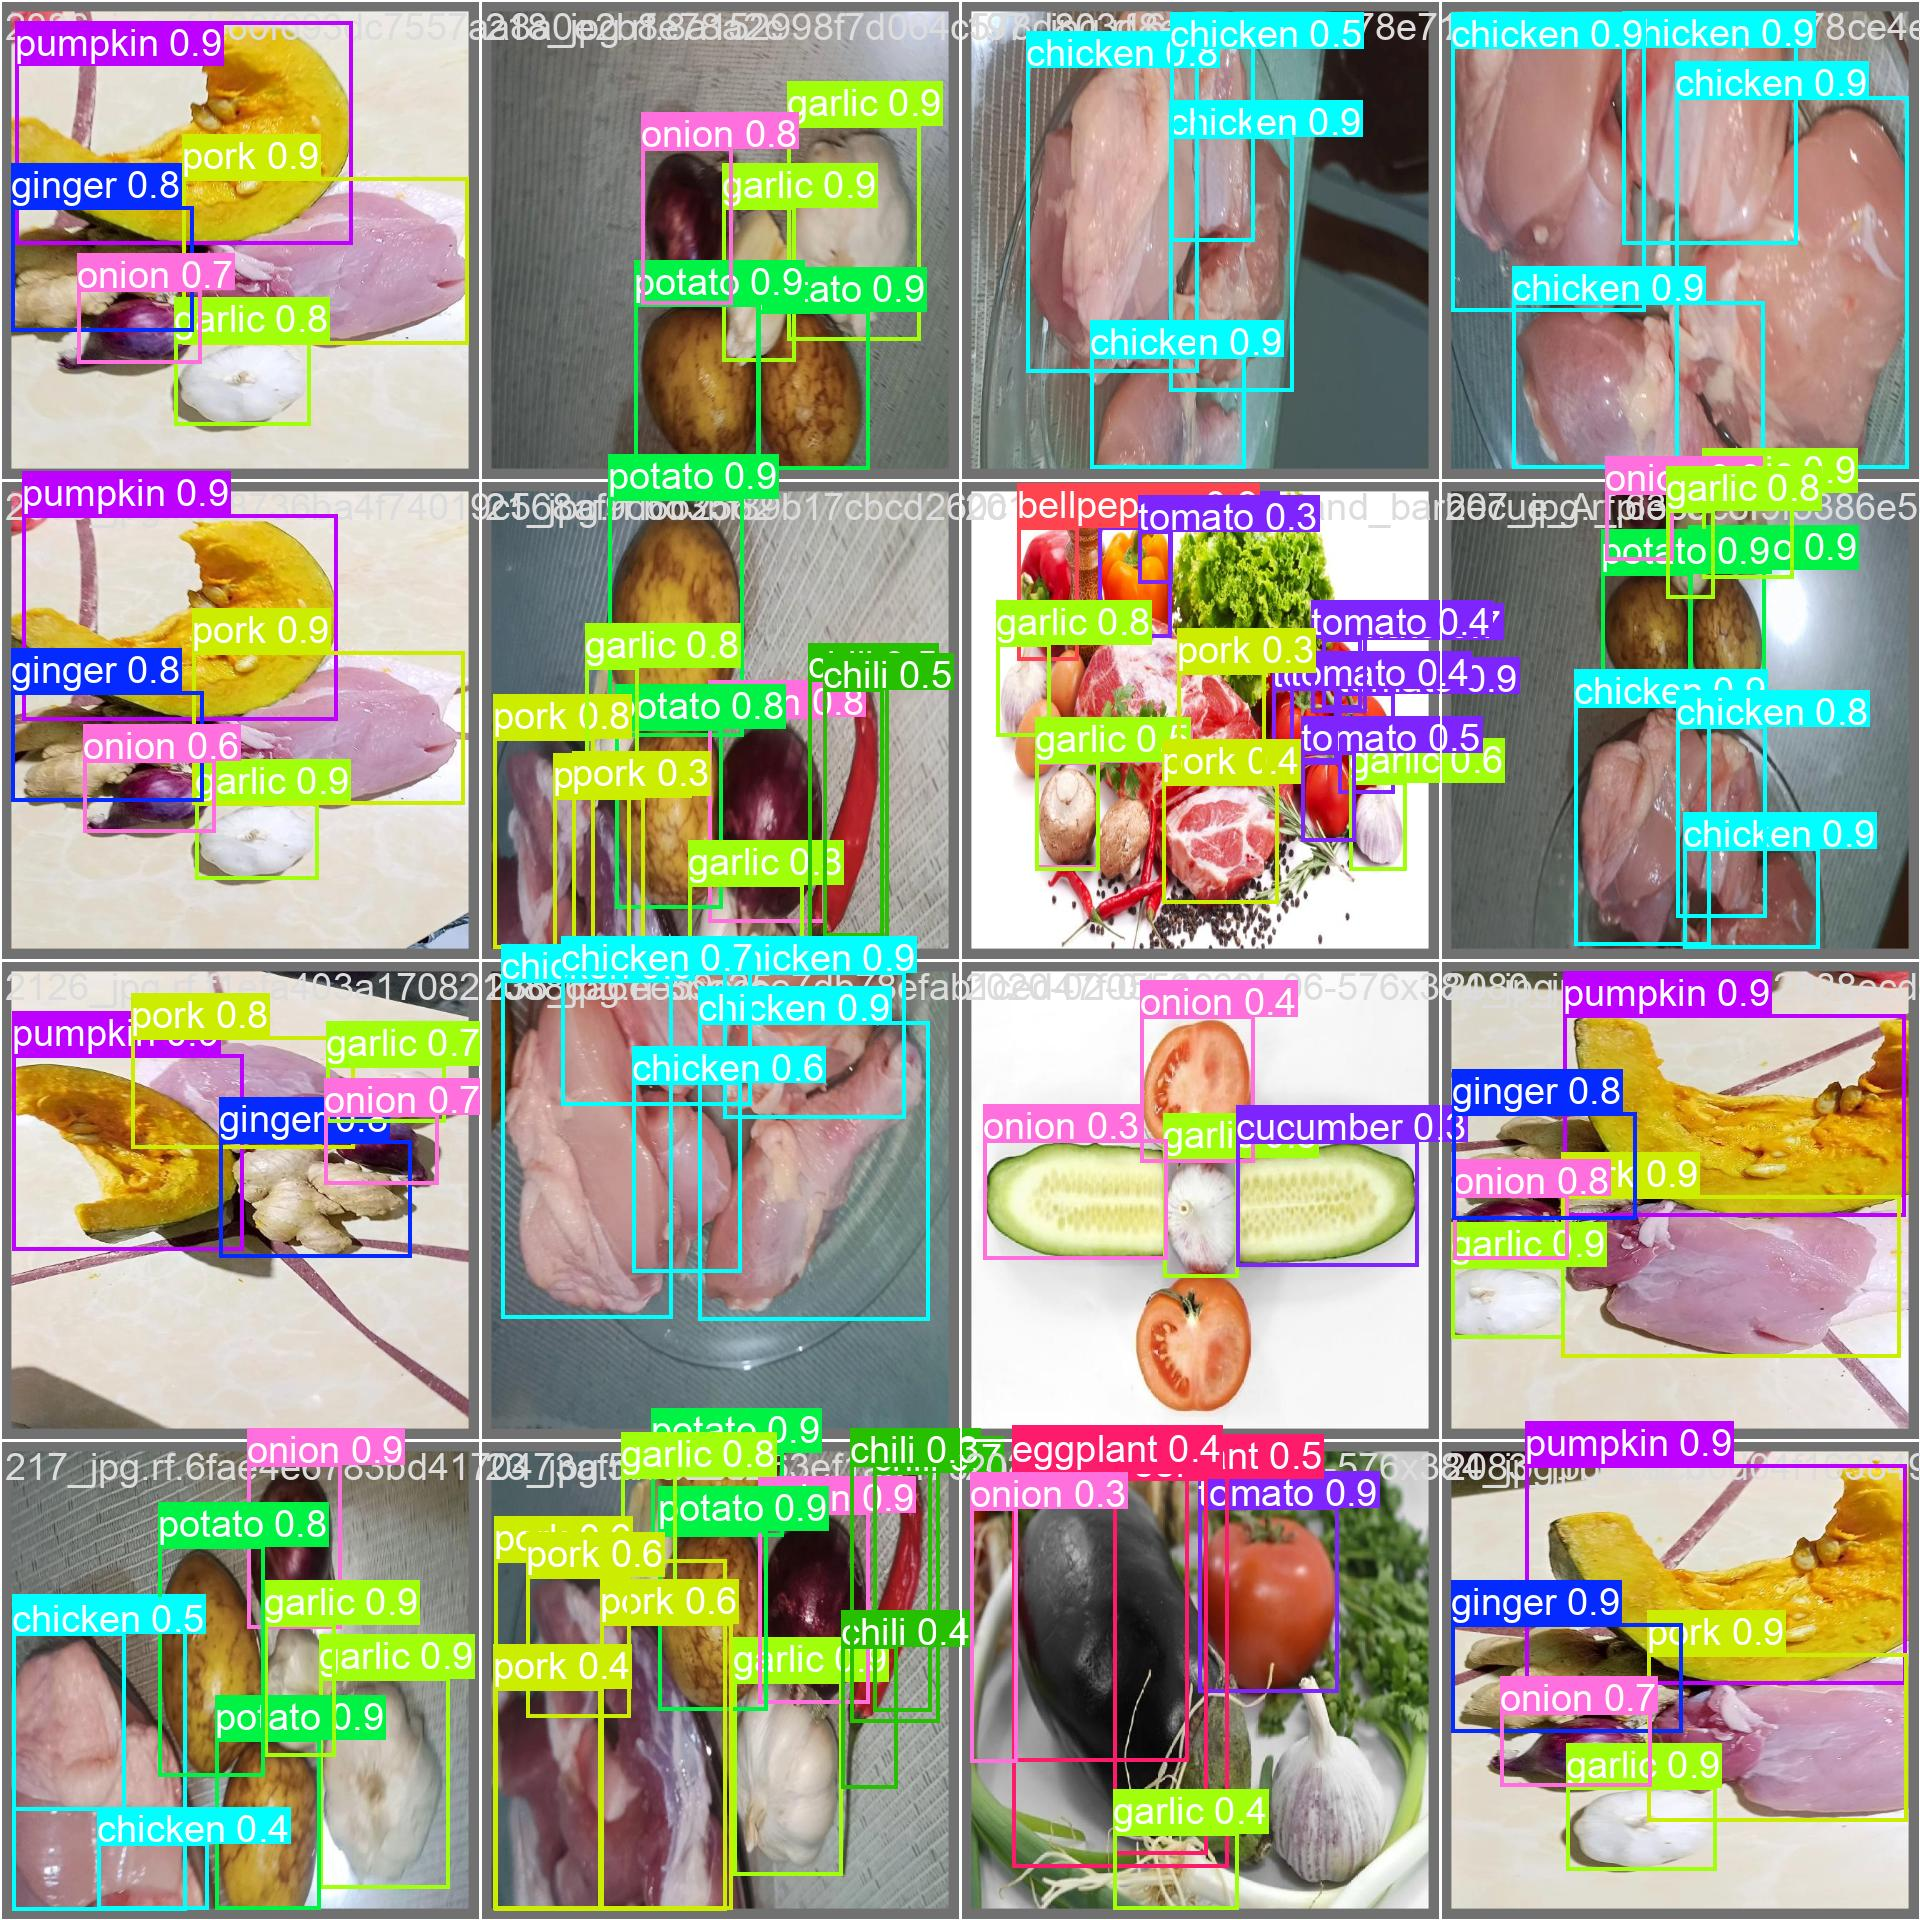

In [18]:
# Validation image set에 대한 추론 결과 시각화
from IPython.display import Image, display
image_path = '/content/ultralytics/runs/detect/train/val_batch2_pred.jpg'
display(Image(filename=image_path, width=1500, height=1000))

# Detect & Crop & Save Detected objecets (per bounding box)


image 1/1 /content/drive/MyDrive/DAB/inference_sample/tmp2.jpg: 640x640 4 garlics, 3 potatos, 2 tomatos, 7.4ms
Speed: 1.7ms preprocess, 7.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


array([[[145, 150, 148],
        [145, 150, 148],
        [145, 150, 148],
        ...,
        [164, 167, 165],
        [164, 167, 165],
        [164, 167, 165]],

       [[145, 150, 148],
        [145, 150, 148],
        [145, 150, 148],
        ...,
        [164, 167, 165],
        [164, 167, 165],
        [164, 167, 165]],

       [[145, 150, 148],
        [145, 150, 148],
        [145, 150, 148],
        ...,
        [164, 167, 165],
        [164, 167, 165],
        [164, 167, 165]],

       ...,

       [[144, 149, 148],
        [144, 149, 148],
        [144, 149, 148],
        ...,
        [116, 121, 119],
        [116, 121, 119],
        [116, 121, 119]],

       [[144, 149, 148],
        [144, 149, 148],
        [144, 149, 148],
        ...,
        [116, 121, 119],
        [116, 121, 119],
        [116, 121, 119]],

       [[144, 149, 148],
        [144, 149, 148],
        [144, 149, 148],
        ...,
        [116, 121, 119],
        [116, 121, 119],
        [116, 121, 119]]], dtype=uint8)
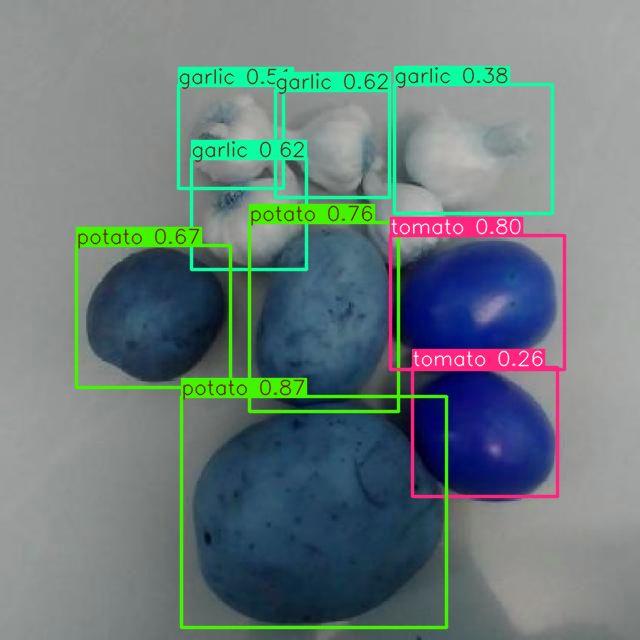

In [23]:
# 처음 마주하는 이미지에 대한 추론 시각화
drive_best_model_path = '/content/drive/MyDrive/DAB/checkpoints/0807/tmp/best.pt'
model = YOLO(drive_best_model_path)
results = model('/content/drive/MyDrive/DAB/inference_sample/tmp2.jpg')
results[0].plot()  # 첫 번째 이미지의 결과 시각화

In [32]:
import cv2

drive_best_model_path = '/content/drive/MyDrive/DAB/checkpoints/0807/tmp/best.pt'
model = YOLO(drive_best_model_path)

# detected results
image_path = '/content/drive/MyDrive/DAB/inference_sample/tmp2.jpg'
results = model(image_path)

# original image
image = cv2.imread(image_path)

# 원본 이미지 이름 추출 (확장자 제외)
image_name = os.path.splitext(os.path.basename(image_path))[0]

# 저장할 디렉토리 경로 설정
base_directory = '/content/drive/MyDrive/DAB/detected'
sub_directory = os.path.join('0807', image_name)
full_directory_path = os.path.join(base_directory, sub_directory)

# 디렉토리가 없으면 생성
os.makedirs(full_directory_path, exist_ok=True)

for result in results:
    for i, box in enumerate(result.boxes):
        # 바운딩 박스 좌표 추출
        x_min, y_min, x_max, y_max = map(int, box.xyxy[0])

        # 객체 클래스 및 신뢰도
        class_id = int(box.cls[0])
        confidence = box.conf[0]

        # 이미지 크롭
        cropped_image = image[y_min:y_max, x_min:x_max]

        # 크롭된 이미지 저장 경로 설정
        cropped_image_name = f'object_{i}_class_{class_id}_conf_{confidence:.2f}.jpg'
        save_path = os.path.join(full_directory_path, cropped_image_name)

        # 크롭된 이미지 저장
        cv2.imwrite(save_path, cropped_image)
        print(f"Saved {cropped_image_name} to {save_path}")


image 1/1 /content/drive/MyDrive/DAB/inference_sample/tmp2.jpg: 640x640 4 garlics, 3 potatos, 2 tomatos, 7.0ms
Speed: 1.8ms preprocess, 7.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Saved object_0_class_28_conf_0.87.jpg to /content/drive/MyDrive/DAB/detected/0807/tmp2/object_0_class_28_conf_0.87.jpg
Saved object_1_class_35_conf_0.80.jpg to /content/drive/MyDrive/DAB/detected/0807/tmp2/object_1_class_35_conf_0.80.jpg
Saved object_2_class_28_conf_0.76.jpg to /content/drive/MyDrive/DAB/detected/0807/tmp2/object_2_class_28_conf_0.76.jpg
Saved object_3_class_28_conf_0.67.jpg to /content/drive/MyDrive/DAB/detected/0807/tmp2/object_3_class_28_conf_0.67.jpg
Saved object_4_class_19_conf_0.62.jpg to /content/drive/MyDrive/DAB/detected/0807/tmp2/object_4_class_19_conf_0.62.jpg
Saved object_5_class_19_conf_0.62.jpg to /content/drive/MyDrive/DAB/detected/0807/tmp2/object_5_class_19_conf_0.62.jpg
Saved object_6_class_19_conf_0.51.jpg to /content/drive/MyDrive/DAB/detected/0

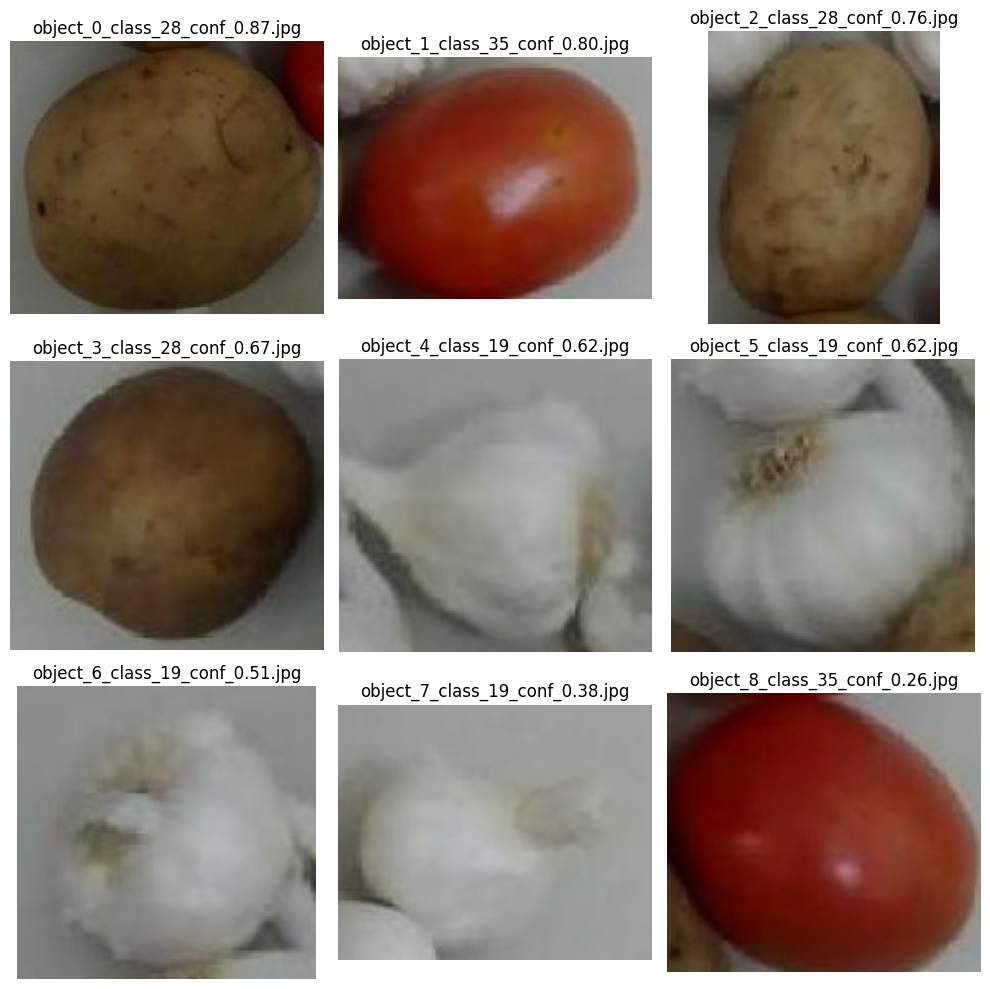

In [36]:
import matplotlib.pyplot as plt

# 저장된 이미지 경로 설정
base_directory = '/content/drive/MyDrive/DAB/detected'
sub_directory = '0807/tmp2'
full_directory_path = os.path.join(base_directory, sub_directory)

# 저장된 이미지 파일 목록 가져오기
image_files = sorted([f for f in os.listdir(full_directory_path) if f.endswith('.jpg')])

# 그리드 크기 설정 (예: 3x3)
num_images = len(image_files)
grid_size = (3, 3)  # 필요한 경우 그리드 크기를 조정하세요.

# 이미지 시각화
fig, axs = plt.subplots(grid_size[0], grid_size[1], figsize=(10, 10))
axs = axs.ravel()  # 2D 배열을 1D로 변환하여 반복문에서 사용할 수 있게 함

for i, img_file in enumerate(image_files):
    if i >= len(axs):
        break  # 표시할 수 있는 그리드 칸보다 이미지가 많을 경우 중단

    # 이미지 읽기
    img_path = os.path.join(full_directory_path, img_file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV의 BGR 형식을 RGB로 변환

    # 이미지 표시
    axs[i].imshow(img)
    axs[i].set_title(img_file)
    axs[i].axis('off')  # 축 제거

# 나머지 빈 칸은 제거
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()
